# Deep Learning - Project 2
**Nina Żukowska 148278**
**Antoni Solarski 148270**

In [1]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from utils import *

# PART 1

---
#### 1) Download the data and load it in the Notebook

In [2]:
download_data_if_not_exists()

In [3]:
# choose 15 classes with most images
# get minimum number of images in class (samples_min)
N_CLASSES = 15
CLASSES, MIN_SAMPLE = choose_biggest_classes(DATA_DIR, N_CLASSES)
print(CLASSES)

['airplanes', 'Motorbikes', 'Faces', 'watch', 'Leopards', 'bonsai', 'car_side', 'ketch', 'chandelier', 'hawksbill', 'grand_piano', 'brain', 'butterfly', 'helicopter', 'menorah']


In [4]:
random.seed(23)

# get only MIN_SAMPLE images (randomly chosen) from each of the chosen classes
# then our classes will be well-balanced

IMAGES, LABELS = load_data(DATA_DIR, CLASSES, MIN_SAMPLE)

In [5]:
print(len(IMAGES), len(LABELS))

1305 1305


(141, 398, 3)
airplanes


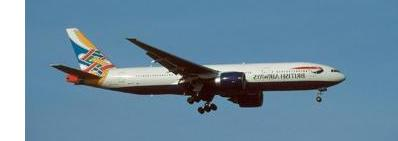

In [6]:
print(IMAGES[0].shape)
print(LABELS[0])
display(Image.fromarray(IMAGES[0]))

---
#### 2) Standardize the images

In [7]:
resized_images = resize_images(IMAGES)

(200, 300, 3)
airplanes


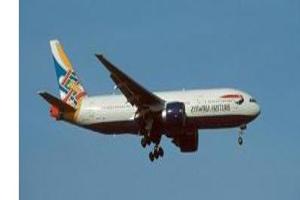

In [8]:
print(resized_images[0].shape)
print(LABELS[0])
display(Image.fromarray(resized_images[0]))

In [9]:
X, MEAN, STD = standardize_images(resized_images)

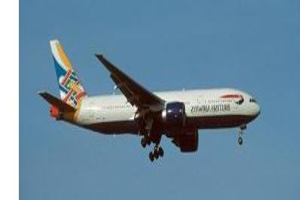

In [10]:
display_standardized_image(X[0], MEAN, STD)

---
#### 3) Divide the collection into Train and Test set

In [11]:
y, labels_enc, labels_ohe = one_hot_encoding_for_labels(LABELS)

In [12]:
X.shape, y.shape

((1305, 200, 300, 3), (1305, 15))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((913, 200, 300, 3), (392, 200, 300, 3), (913, 15), (392, 15))

In [14]:
count_samples_in_class(y_train, labels_enc, labels_ohe)
count_samples_in_class(y_test, labels_enc, labels_ohe)

{'Faces': 61, 'hawksbill': 61, 'brain': 61, 'Leopards': 61, 'helicopter': 60, 'butterfly': 61, 'Motorbikes': 61, 'chandelier': 60, 'menorah': 61, 'watch': 61, 'car_side': 61, 'ketch': 61, 'bonsai': 61, 'airplanes': 61, 'grand_piano': 61}
{'ketch': 26, 'menorah': 26, 'brain': 26, 'Leopards': 26, 'grand_piano': 26, 'butterfly': 26, 'hawksbill': 26, 'Faces': 26, 'watch': 26, 'car_side': 26, 'Motorbikes': 26, 'airplanes': 26, 'helicopter': 27, 'chandelier': 27, 'bonsai': 26}


Faces


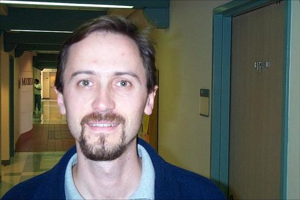

In [15]:
example_img = X_train[0]
print(resolve_label(y_train[0], labels_enc, labels_ohe))
display_standardized_image(example_img, MEAN, STD)

---
#### 4) Define the model

In [16]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 300, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 300, 16)      2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 300, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 150, 32)      4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 150, 32)      9248      
                                                        

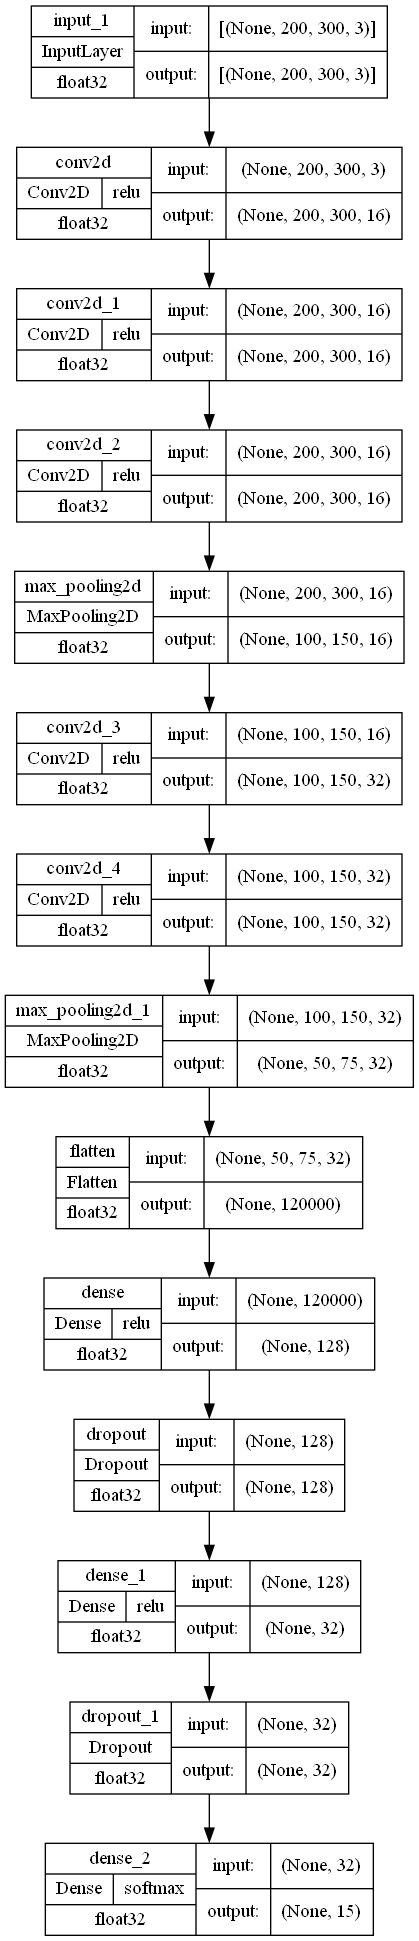

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)

---
#### 5) Train the model

In [74]:
EPOCHS = 250
BATCH_SIZE = 32
history = train_model(model, X_train, y_train, X_test, y_test, EPOCHS, BATCH_SIZE)

Epoch 1/250
29/29 [==============================] - 45s 2s/step - loss: 2.7155 - accuracy: 0.0723 - val_loss: 2.7052 - val_accuracy: 0.1071
Epoch 2/250
29/29 [==============================] - 43s 1s/step - loss: 2.6988 - accuracy: 0.0876 - val_loss: 2.6716 - val_accuracy: 0.1097
Epoch 3/250
29/29 [==============================] - 44s 2s/step - loss: 2.6969 - accuracy: 0.0887 - val_loss: 2.6613 - val_accuracy: 0.1403
Epoch 4/250
29/29 [==============================] - 42s 1s/step - loss: 2.6595 - accuracy: 0.0975 - val_loss: 2.5605 - val_accuracy: 0.2117
Epoch 5/250
29/29 [==============================] - 43s 1s/step - loss: 2.4889 - accuracy: 0.1763 - val_loss: 2.3647 - val_accuracy: 0.3010
Epoch 6/250
29/29 [==============================] - 43s 1s/step - loss: 2.3467 - accuracy: 0.2497 - val_loss: 2.0447 - val_accuracy: 0.4821
Epoch 7/250
29/29 [==============================] - 43s 1s/step - loss: 2.0900 - accuracy: 0.3253 - val_loss: 1.7674 - val_accuracy: 0.5255
Epoch 8/250
2

In [75]:
# test the model
MODEL_EVAL = model.evaluate(X_test, y_test)

13/13 [==============================] - 3s 233ms/step - loss: 0.9207 - accuracy: 0.7704


In [76]:
# get predictions
y_test_raw_predictions = model.predict(X_test)

y_test_predictions, y_test_true = convert_predictions(y_test_raw_predictions, y_test, labels_ohe)
y_test_predictions_labels, y_test_true_labels = get_labels_from_predictions(y_test_predictions, y_test_true, labels_enc)

13/13 [==============================] - 3s 234ms/step


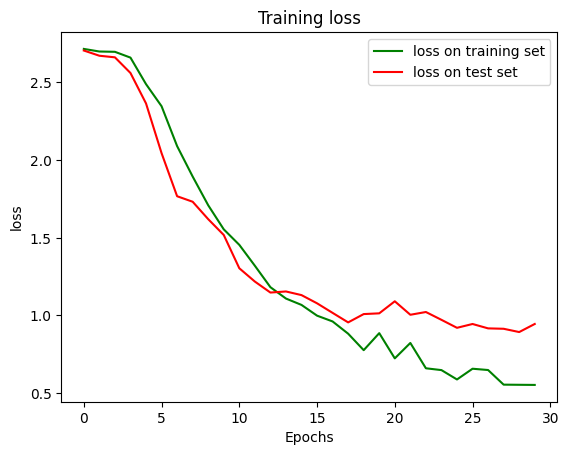

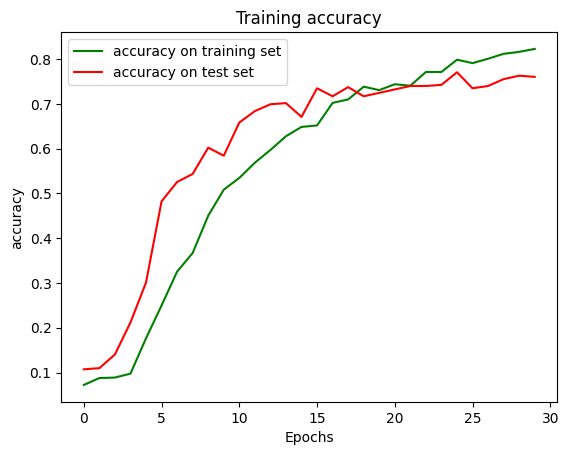

In [79]:
plot_metrics_from_model_history(history, 'loss')
plot_metrics_from_model_history(history, 'accuracy')

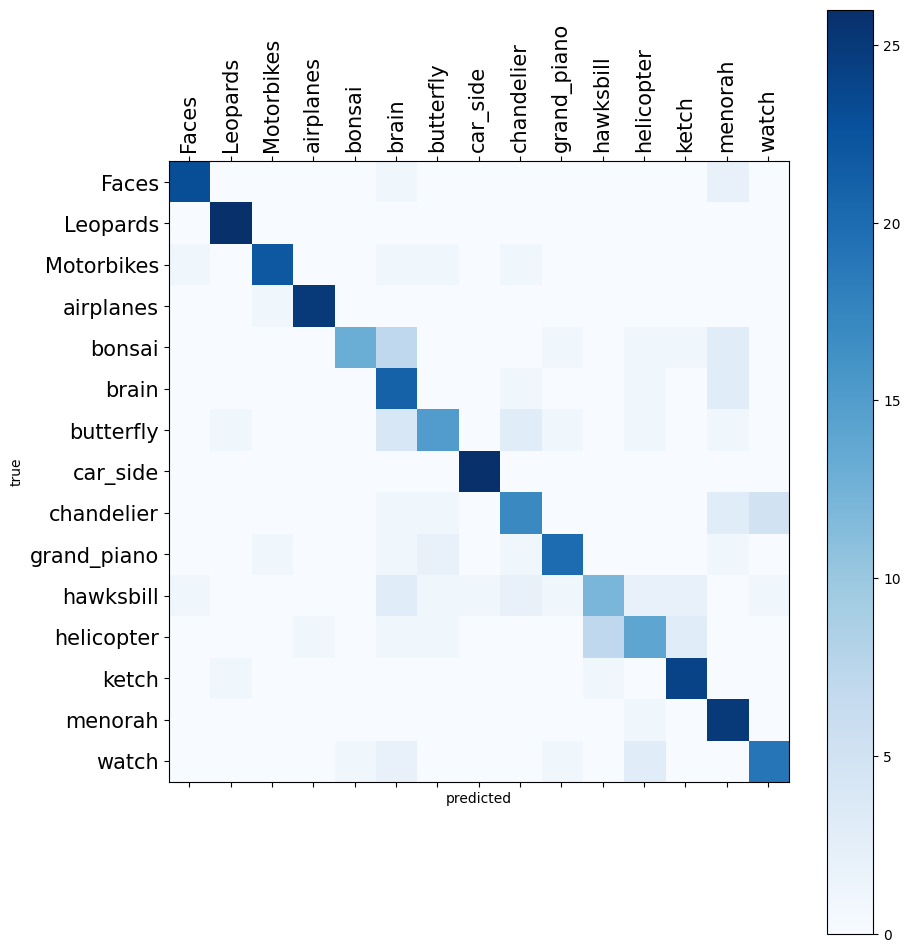

In [81]:
confusion_matrix = tf.math.confusion_matrix(y_test_true, y_test_predictions)
plot_confusion_matrix(confusion_matrix, labels_enc.inverse_transform([i for i in range(N_CLASSES)]))

In [82]:
report = classification_report(y_test_true_labels, y_test_predictions_labels, zero_division=0)
print(report)

              precision    recall  f1-score   support

       Faces       0.92      0.88      0.90        26
    Leopards       0.93      1.00      0.96        26
  Motorbikes       0.92      0.85      0.88        26
   airplanes       0.96      0.96      0.96        26
      bonsai       0.93      0.50      0.65        26
       brain       0.50      0.81      0.62        26
   butterfly       0.71      0.58      0.64        26
    car_side       0.96      1.00      0.98        26
  chandelier       0.68      0.63      0.65        27
 grand_piano       0.83      0.77      0.80        26
   hawksbill       0.60      0.46      0.52        26
  helicopter       0.61      0.52      0.56        27
       ketch       0.80      0.92      0.86        26
     menorah       0.66      0.96      0.78        26
       watch       0.76      0.73      0.75        26

    accuracy                           0.77       392
   macro avg       0.78      0.77      0.77       392
weighted avg       0.78   

In [84]:
c_idx, w_idx = None, None
for i, (ti, pi) in enumerate(zip(y_test_true, y_test_predictions)):
    if ti == pi:
        c_idx = i
    if ti != pi:
        w_idx = i
    if c_idx and w_idx:
        break

grand_piano correctly classified


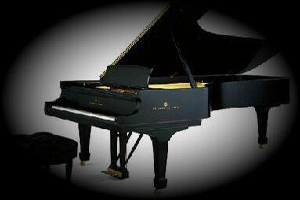

probabilities:
grand_piano: 0.9918650984764099
butterfly: 0.007686268072575331
helicopter: 0.00024115137057378888
brain: 0.00016356800915673375
menorah: 1.403844726155512e-05
chandelier: 1.3148468497092836e-05
Motorbikes: 7.269560228451155e-06
watch: 5.633721229969524e-06
Leopards: 1.673458427831065e-06
Faces: 8.41667542772484e-07
bonsai: 6.049996841284155e-07
airplanes: 3.037763462998555e-07
ketch: 2.5364016664752853e-07
hawksbill: 3.775432233510401e-08
car_side: 9.523727584337394e-09


In [85]:
show_classification_example(y_test_raw_predictions[c_idx], X_test[c_idx], y_test_predictions_labels[c_idx],
                            y_test_true_labels[c_idx], labels_enc, lambda x: display_standardized_image(x, MEAN, STD))

watch classified as helicopter


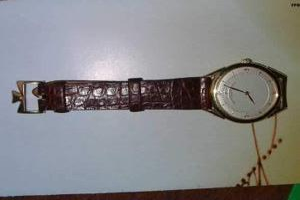

probabilities:
helicopter: 0.21575459837913513
watch: 0.20333249866962433
grand_piano: 0.16107481718063354
brain: 0.07198180258274078
butterfly: 0.06631416827440262
menorah: 0.06435669958591461
Motorbikes: 0.05244053155183792
chandelier: 0.03063730150461197
bonsai: 0.027531208470463753
airplanes: 0.02014276199042797
Faces: 0.01881563290953636
ketch: 0.017406411468982697
Leopards: 0.01739390939474106
car_side: 0.016690930351614952
hawksbill: 0.016126757487654686


In [86]:
show_classification_example(y_test_raw_predictions[w_idx], X_test[w_idx], y_test_predictions_labels[w_idx],
                            y_test_true_labels[w_idx], labels_enc, lambda x: display_standardized_image(x, MEAN, STD))

---
#### 6) Save the model to disk

In [88]:
model_path = save_model(model, int(MODEL_EVAL[1] * 100))

INFO:tensorflow:Assets written to: models/77-2023-01-16\assets


INFO:tensorflow:Assets written to: models/77-2023-01-16\assets


In [89]:
loaded_model = tf.keras.models.load_model(model_path)
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 200, 300, 16)      448       
                                                                 
 conv2d_10 (Conv2D)          (None, 200, 300, 16)      2320      
                                                                 
 conv2d_11 (Conv2D)          (None, 200, 300, 16)      2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 150, 32)      4640      
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 150, 32)      9248      
                                                      

In [90]:
loaded_model.evaluate(X_test, y_test)

13/13 [==============================] - 3s 232ms/step - loss: 0.9207 - accuracy: 0.7704


[0.9206514954566956, 0.7704081535339355]

13/13 [==============================] - 3s 234ms/step


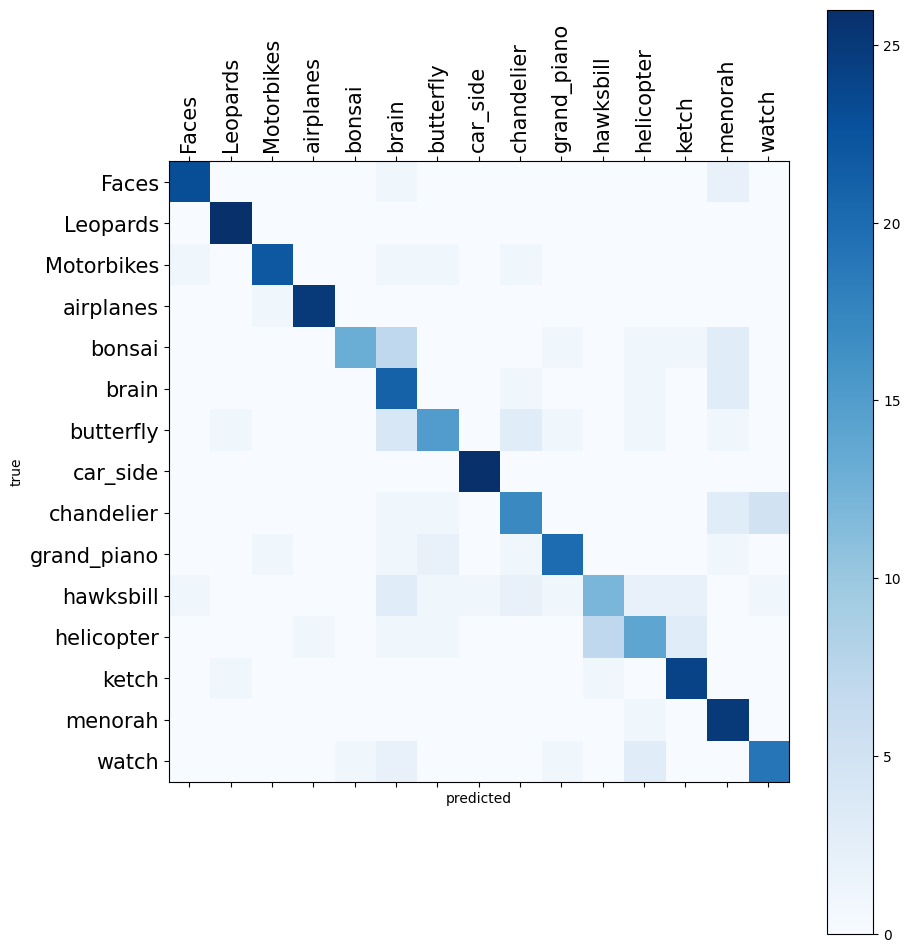

In [91]:
loaded_model_predictions = np.asarray(tf.argmax(loaded_model.predict(X_test).T))
confusion_matrix = tf.math.confusion_matrix(y_test_true, loaded_model_predictions)
plot_confusion_matrix(confusion_matrix, labels_enc.inverse_transform([i for i in range(N_CLASSES)]))

---
#### 7) Summary of the Part 1 - describe your observations

##### Results discussion
We got **77% accuracy** on the test set with a pretty small model (**15,383,727 parameters**). Given the number of **classes (15)** and the relatively small dataset (**913 images** in the training set), we consider the obtained accuracy to be quite good.

##### Overfitting obstacles
Initially, we faced pretty big overfitting, with about 99% accuracy on the training set and 60% on the test set. But after adding dropout (0.5, only in dense layers, as it's suggested by [Hinton](https://arxiv.org/pdf/1207.0580.pdf)) and changing the early stopping condition to track validation statistics instead of training ones, we overcome overfitting problems.

##### (Non)problematic classes
Our model performed best in the *car_side*, *leopards*, and *airplanes* classes, with **over 0.95 F1-scores** in each of these categories. It had a difficult time classifying images like *hawksbill*, *helikopter*, and *brain*. We can see that *hawksbill* is often classified as another object what resulted in **poor recall** (possible explanation is that the hawksbill (sea turtle) looks much different from the top and side view). Another problem is connected to *brain* class - other object were often misclassified as *brain*, this resulted in pretty good recall but **poor precision**.

We can derive interesting observation from the example results produced by model and presented above. One can see that *grand_piano* was classified correctly with almost 99% confidence, while misclassified *watch* was classified as *helicopter* only by small probability difference (0.21 vs 0.22).

##### Possible improvements
- We saw one possible data leakage. We did standardization on the whole set of images (before dividing it into the training and test sets). Calculation of statistics on the whole dataset is usually not recommended, because these may differ between the training and test sets and should be calculated after the split. On the other hand, in our case, we don't expect any significant statistical differences between images in different sets.
- We could consider adding the dropout for convolutional blocks as well. As [newer research](http://mipal.snu.ac.kr/images/1/16/Dropout_ACCV2016.pdf) suggests small dropout rates (0.1 or 0.2) on convolutional layers can improve quality of the results.
- We could consider adding using [cost-sensitive learning](https://www.researchgate.net/publication/2365611_The_Foundations_of_Cost-Sensitive_Learning) adding greater punishments for most problematic classes (like *brain* in our case).